<a href="https://colab.research.google.com/github/Amos0707/ML/blob/main/7_AdaBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
# import libarires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [19]:
# Load Dataset
data = pd.read_csv('Titanic-Dataset.csv')


In [20]:
#Cleaning the data
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [22]:
data.shape

(891, 12)

In [23]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [25]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [26]:
data. dropna(subset=['Age','Cabin','Embarked'],inplace =True )

In [27]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB


Data visualiztiuon

<Axes: xlabel='Survived', ylabel='count'>

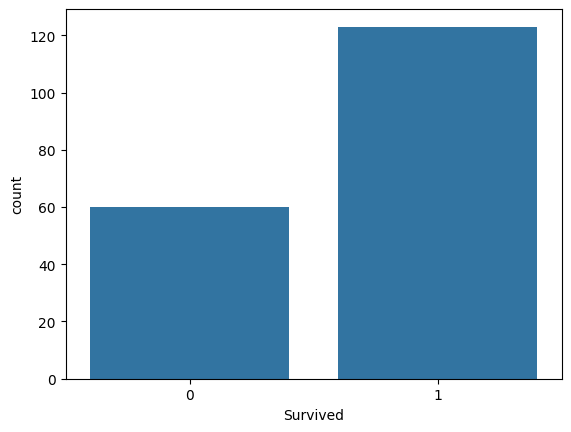

In [56]:
sns.countplot(x='Survived',data=data)

In [17]:
# daata preprocessing
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error,r2_score

In [29]:
le = LabelEncoder()
data['sex'] = le.fit_transform(data['Sex'])
data['Embarked'] = le.fit_transform(data['Embarked'])
data['Cabin'] = le.fit_transform(data['Cabin'])
data['Name'] = le.fit_transform(data['Name'])
data['Ticket'] = le.fit_transform(data['Ticket'])

In [34]:
for col in data.select_dtypes(include='object').columns:
    data[col] = le.fit_transform(data[col])


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, 1 to 889
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    int64  
 4   Sex          183 non-null    int64  
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    int64  
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    int64  
 11  Embarked     183 non-null    int64  
 12  sex          183 non-null    int64  
dtypes: float64(2), int64(11)
memory usage: 20.0 KB


In [36]:
#train the model
x = data.drop('Survived',axis=1)
y = data['Survived']

In [37]:
#split the data
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2,random_state=42)

In [38]:
#model
model = AdaBoostClassifier()
model.fit(x_train,y_train)

AdaBoostClassifier()

In [39]:
# predict the model
y_pred = model.predict(x_test)

In [40]:
#Evaluate the model
accuracy = accuracy_score(y_test,y_pred)
print('Accuracy:',accuracy)
confusion_matrix = confusion_matrix(y_test,y_pred)
print('Confusion Matrix:\n',confusion_matrix)
classification_report = classification_report(y_test,y_pred)
print('Classification Report:\n',classification_report)

Accuracy: 0.7297297297297297
Confusion Matrix:
 [[ 7  7]
 [ 3 20]]
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.50      0.58        14
           1       0.74      0.87      0.80        23

    accuracy                           0.73        37
   macro avg       0.72      0.68      0.69        37
weighted avg       0.73      0.73      0.72        37



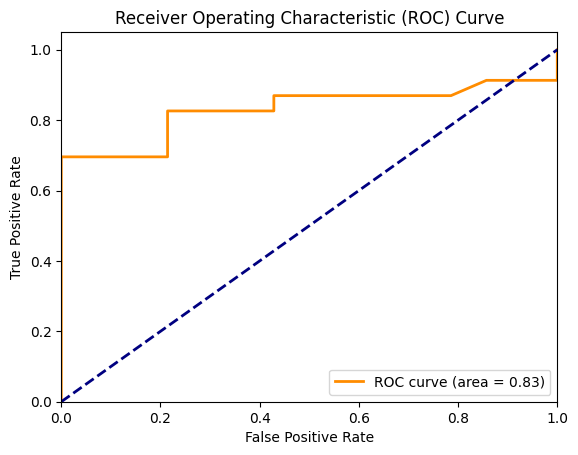

In [42]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# Get predicted probabilities for the positive class
y_pred_proba = model.predict_proba(x_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()



AdaBoost Regressor


In [44]:
# drop the target value
x = data.drop(['Survived'],axis=1)
y = data['Survived']

In [45]:
# split the x and y
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=60)

In [46]:
#instilazie the model
model = AdaBoostRegressor()
model.fit(x_train,y_train)

AdaBoostRegressor()

In [47]:
#predict the model
y_pred = model.predict(x_test)

In [48]:
mse = mean_squared_error(y_test,y_pred)
print('Mean Squared Error:',mse)
r2 = r2_score(y_test,y_pred)
print('R2 Score:',r2)

Mean Squared Error: 0.1556700250496529
R2 Score: 0.2896257856900838


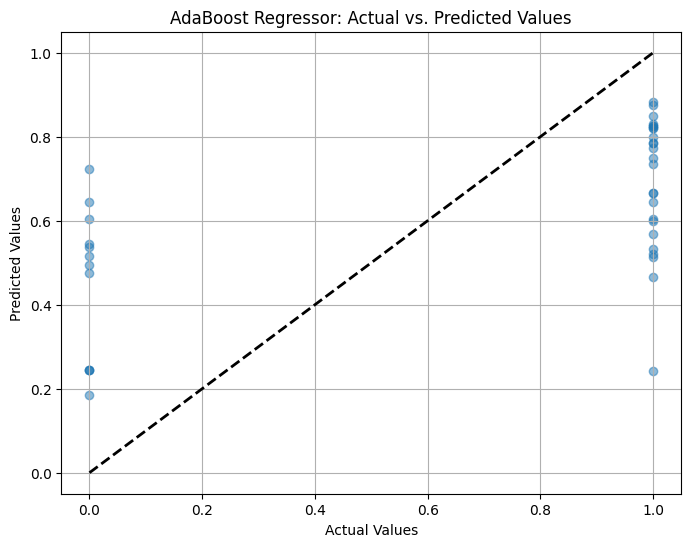

In [55]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Add a diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('AdaBoost Regressor: Actual vs. Predicted Values')
plt.grid(True)
plt.show()

